In [1]:
#Predictive model analyzing relationship between race and employment status, employer satisfaction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 

In [2]:
#reading data
data = pd.read_csv('HRDataset_v14.csv')
pd.set_option('display.max_columns', None)
data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,7/10/1983,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,5/5/1975,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,9/19/1988,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,9/27/1988,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,9/8/1989,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,0,20,Production Technician II,MA,1810,5/11/1985,M,Single,US Citizen,No,White,7/7/2014,NaN,N/A-StillEmployed,Active,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,1,19,Production Technician I,MA,2458,5/4/1982,F,Single,US Citizen,No,Asian,9/2/2008,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,8/30/1979,F,Single,US Citizen,No,White,4/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,0,9,Data Analyst,MA,2148,2/24/1979,F,Single,US Citizen,No,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [3]:
#dropping irrelevant columns
data_cleaned = data.drop(columns = ['Employee_Name','Termd','Zip','Sex','EmpID','MarriedID','MaritalStatusID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'ManagerName','ManagerID','State','Position','MaritalDesc','Department','ManagerName','ManagerID','RecruitmentSource','EngagementSurvey','LastPerformanceReview_Date', 'TermReason'])
data_cleaned

,GenderID,Salary,PositionID,DOB,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,EmploymentStatus,PerformanceScore,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,1,62506,19,7/10/1983,US Citizen,No,White,7/5/2011,NaN,Active,Exceeds,5,0,0,1
1,1,104437,27,5/5/1975,US Citizen,No,White,3/30/2015,6/16/2016,Voluntarily Terminated,Fully Meets,3,6,0,17
2,0,64955,20,9/19/1988,US Citizen,No,White,7/5/2011,9/24/2012,Voluntarily Terminated,Fully Meets,3,0,0,3
3,0,64991,19,9/27/1988,US Citizen,No,White,1/7/2008,NaN,Active,Fully Meets,5,0,0,15
4,0,50825,19,9/8/1989,US Citizen,No,White,7/11/2011,9/6/2016,Voluntarily Terminated,Fully Meets,4,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,65893,20,5/11/1985,US Citizen,No,White,7/7/2014,NaN,Active,Fully Meets,4,0,0,13
307,0,48513,19,5/4/1982,US Citizen,No,Asian,9/2/2008,9/29/2015,Voluntarily Terminated,PIP,2,0,5,4
308,0,220450,6,8/30/1979,US Citizen,No,White,4/10/2010,NaN,Active,Exceeds,5,6,0,16
309,0,89292,9,2/24/1979,US Citizen,No,White,3/30/2015,NaN,Active,Fully Meets,3,5,0,11


In [4]:
#dropping all employees that were not voluntarily terminated 
#For gender ID, 1 = male and 0 = female 
data_cleaned = data_cleaned[data_cleaned['EmploymentStatus']!='Terminated for Cause']

In [5]:
data_cleaned

,GenderID,Salary,PositionID,DOB,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,EmploymentStatus,PerformanceScore,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,1,62506,19,7/10/1983,US Citizen,No,White,7/5/2011,NaN,Active,Exceeds,5,0,0,1
1,1,104437,27,5/5/1975,US Citizen,No,White,3/30/2015,6/16/2016,Voluntarily Terminated,Fully Meets,3,6,0,17
2,0,64955,20,9/19/1988,US Citizen,No,White,7/5/2011,9/24/2012,Voluntarily Terminated,Fully Meets,3,0,0,3
3,0,64991,19,9/27/1988,US Citizen,No,White,1/7/2008,NaN,Active,Fully Meets,5,0,0,15
4,0,50825,19,9/8/1989,US Citizen,No,White,7/11/2011,9/6/2016,Voluntarily Terminated,Fully Meets,4,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,65893,20,5/11/1985,US Citizen,No,White,7/7/2014,NaN,Active,Fully Meets,4,0,0,13
307,0,48513,19,5/4/1982,US Citizen,No,Asian,9/2/2008,9/29/2015,Voluntarily Terminated,PIP,2,0,5,4
308,0,220450,6,8/30/1979,US Citizen,No,White,4/10/2010,NaN,Active,Exceeds,5,6,0,16
309,0,89292,9,2/24/1979,US Citizen,No,White,3/30/2015,NaN,Active,Fully Meets,3,5,0,11


In [6]:
#Assign "performance score" an integer value
#Find all unique values in the columns
print(data_cleaned['PerformanceScore'].unique())

['Exceeds' 'Fully Meets' 'Needs Improvement' 'PIP']


In [7]:
# PIP indicates the need for a performance improvement plan, indicating that the employee is performing below expectations
score_to_int = {'PIP': 1, 'Needs Improvement': 2, 'Fully Meets':3,'Exceeds':4}
data_cleaned['PerformanceScore_Int'] = data_cleaned['PerformanceScore'].map(score_to_int)
data_cleaned = data_cleaned.drop('PerformanceScore',axis=1)


/tmp/ipykernel_1299/1196998469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['PerformanceScore_Int'] = data_cleaned['PerformanceScore'].map(score_to_int)


In [8]:
#Find all unique RaceDesc values
print(data_cleaned['RaceDesc'].unique())

['White' 'Black or African American' 'Two or more races' 'Asian'
 'American Indian or Alaska Native' 'Hispanic']


In [9]:
#Assign races an integer value
race_to_int = {'White':1,'Black or African American':2,'Asian':3,'Two or more races':4}
data_cleaned['RaceDesc_Int'] = data_cleaned['RaceDesc'].map(race_to_int)
data_cleaned = data_cleaned.drop('RaceDesc',axis=1)


In [10]:
#Get all unique CitizenDesc values
print(data_cleaned['CitizenDesc'].unique())

['US Citizen' 'Eligible NonCitizen' 'Non-Citizen']


In [11]:
#Turn CitizenDesc values into integers values
citizen_to_int = {'US Citizen':1,'Eligible NonCitizen':2,'Non-Citizen':3}
data_cleaned['Citizen_int'] = data_cleaned['CitizenDesc'].map(citizen_to_int)
data_cleaned = data_cleaned.drop('CitizenDesc',axis=1)

In [12]:
#Assign lation/hispanic descriptor an integer value
latino_to_int = {'Yes':1,'No':0}
data_cleaned['Latino_Int'] = data_cleaned['HispanicLatino'].map(latino_to_int)
data_cleaned = data_cleaned.drop('HispanicLatino',axis=1)


In [13]:
data_cleaned['EmploymentStatus'].unique()

array(['Active', 'Voluntarily Terminated'], dtype=object)

In [14]:
#Assign numerical value to employment status
EmpStat_int = {'Active':0,'Voluntarily Terminated':1}
data_cleaned['EmpStatus_Int'] = data_cleaned['EmploymentStatus'].map(EmpStat_int)
data_cleaned = data_cleaned.drop('EmploymentStatus',axis=1)
data_cleaned

,GenderID,Salary,PositionID,DOB,DateofHire,DateofTermination,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,PerformanceScore_Int,RaceDesc_Int,Citizen_int,Latino_Int,EmpStatus_Int
0,1,62506,19,7/10/1983,7/5/2011,NaN,5,0,0,1,4,1.0,1,0.0,0
1,1,104437,27,5/5/1975,3/30/2015,6/16/2016,3,6,0,17,3,1.0,1,0.0,1
2,0,64955,20,9/19/1988,7/5/2011,9/24/2012,3,0,0,3,3,1.0,1,0.0,1
3,0,64991,19,9/27/1988,1/7/2008,NaN,5,0,0,15,3,1.0,1,0.0,0
4,0,50825,19,9/8/1989,7/11/2011,9/6/2016,4,0,0,2,3,1.0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,65893,20,5/11/1985,7/7/2014,NaN,4,0,0,13,3,1.0,1,0.0,0
307,0,48513,19,5/4/1982,9/2/2008,9/29/2015,2,0,5,4,1,3.0,1,0.0,1
308,0,220450,6,8/30/1979,4/10/2010,NaN,5,6,0,16,4,1.0,1,0.0,0
309,0,89292,9,2/24/1979,3/30/2015,NaN,3,5,0,11,3,1.0,1,0.0,0


In [15]:
#Find how long an employee worked at the company
#Convert to datetime objects
from datetime import date
data_cleaned['DateofHire'] = pd.to_datetime(data_cleaned['DateofHire'])
data_cleaned['DateofTermination'] = pd.to_datetime(data_cleaned['DateofTermination'])
data_cleaned['DOB'] = pd.to_datetime(data_cleaned['DOB'])
today = pd.to_datetime(date.today())

#calculate time difference in days
data_cleaned['TimeAtCompany (Yrs)'] = ((data_cleaned['DateofTermination']-data_cleaned['DateofHire']).dt.days/365).values.astype(np.float64)
data_cleaned['EmployeeAge'] = (((today - data_cleaned['DOB']).dt.days)/365).values.astype(np.float64)

#drop all columns with dates
df_last = data_cleaned.drop(columns=['DOB','DateofHire','DateofTermination','PositionID','Latino_Int'])
#df_final = data_cleaned.drop('time_dif',axis =1)

#fill null values
df_final = df_last.fillna(0)
df_final

,GenderID,Salary,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,PerformanceScore_Int,RaceDesc_Int,Citizen_int,EmpStatus_Int,TimeAtCompany (Yrs),EmployeeAge
0,1,62506,5,0,0,1,4,1.0,1,0,0.000000,39.816438
1,1,104437,3,6,0,17,3,1.0,1,1,1.216438,48.002740
2,0,64955,3,0,0,3,3,1.0,1,1,1.224658,34.616438
3,0,64991,5,0,0,15,3,1.0,1,0,0.000000,34.594521
4,0,50825,4,0,0,2,3,1.0,1,1,5.161644,33.646575
...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,65893,4,0,0,13,3,1.0,1,0,0.000000,37.978082
307,0,48513,2,0,5,4,1,3.0,1,1,7.076712,41.000000
308,0,220450,5,6,0,16,4,1.0,1,0,0.000000,43.679452
309,0,89292,3,5,0,11,3,1.0,1,0,0.000000,44.191781


In [16]:
#descriptive statistics
df_final.describe()

,GenderID,Salary,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,PerformanceScore_Int,RaceDesc_Int,Citizen_int,EmpStatus_Int,TimeAtCompany (Yrs),EmployeeAge
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,0.433898,68682.016949,3.894915,1.179661,0.325424,10.166102,3.003390,1.535593,1.067797,0.298305,1.039647,44.317483
std,0.496453,25186.503432,0.910525,2.326626,1.141009,5.844022,0.562419,0.823499,0.301042,0.458292,1.935528,8.978188
min,0.000000,45046.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,30.704110
25%,0.000000,55370.000000,3.000000,0.000000,0.000000,5.000000,3.000000,1.000000,1.000000,0.000000,0.000000,36.923288
50%,0.000000,62910.000000,4.000000,0.000000,0.000000,10.000000,3.000000,1.000000,1.000000,0.000000,0.000000,42.753425
75%,1.000000,71818.000000,5.000000,0.000000,0.000000,15.000000,3.000000,2.000000,1.000000,1.000000,1.220548,49.421918
max,1.000000,250000.000000,5.000000,8.000000,6.000000,20.000000,4.000000,4.000000,3.000000,1.000000,9.569863,72.356164


In [17]:
##Next steps
#Validate the data
#Visualization
#Find prediction model that best fits our needs and implement it 

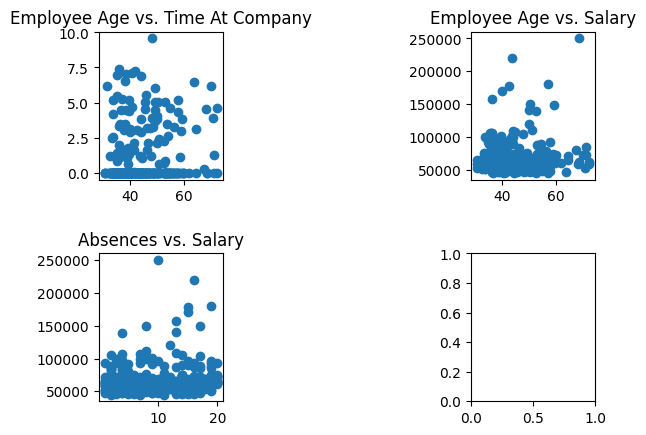

In [18]:
#Visualization to get a better idea of the relationship between the data
fig1,axes = plt.subplots(2,2)
axes[0,0].scatter(df_final['EmployeeAge'],df_final['TimeAtCompany (Yrs)'])
axes[0,0].set_title('Employee Age vs. Time At Company')
axes[0,1].scatter(df_final['EmployeeAge'],df_final['Salary'])
axes[0,1].set_title('Employee Age vs. Salary')
axes[1,0].scatter(df_final['Absences'],df_final['Salary'])
axes[1,0].set_title('Absences vs. Salary')
plt.subplots_adjust(wspace=2,hspace=.5)

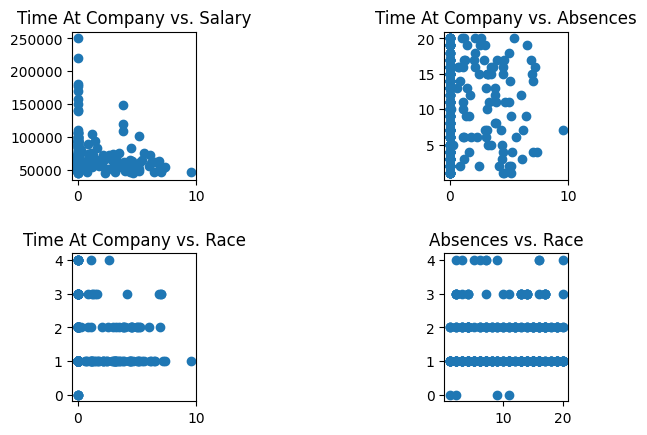

In [19]:
#More data visualization
fig2, axes = plt.subplots(2,2)
axes[0,0].scatter(df_final['TimeAtCompany (Yrs)'],df_final['Salary'])
axes[0,0].set_title('Time At Company vs. Salary')
axes[0,1].scatter(df_final['TimeAtCompany (Yrs)'],df_final['Absences'])
axes[0,1].set_title('Time At Company vs. Absences')
axes[1,0].scatter(df_final['TimeAtCompany (Yrs)'],df_final['RaceDesc_Int'])
axes[1,0].set_title('Time At Company vs. Race')
axes[1,1].scatter(df_final['Absences'],df_final['RaceDesc_Int'])
axes[1,1].set_title('Absences vs. Race')
plt.subplots_adjust(wspace = 2, hspace = 0.5)

In [20]:
##Analyzing above charts for quick future reference
#Time at company vs race: The majority of the people working for the company are White (1) or Black (2). White people tend to stay at the company longer than the other races, which could lead to a computer picking up a racial bias
#Absences vs Race: There are only two people of mixed race working at the company and both of them have a large number of absences (could lead to racial bias). The absences of the white employees are very evenly distributed. 

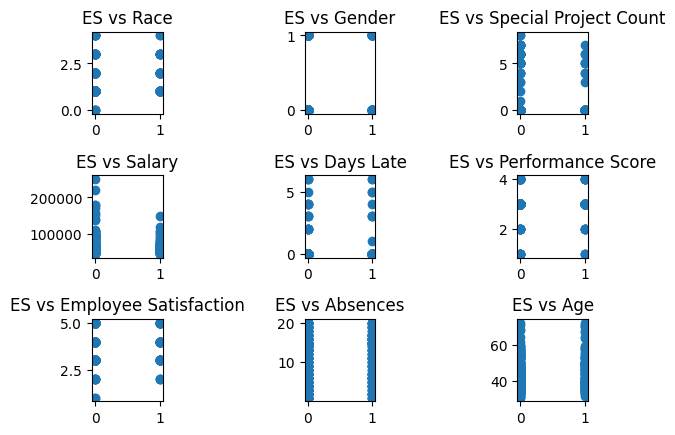

In [21]:
#Even more data visualization
#Emp Status: 0 = active, 1 = voluntarily terminated
fig3, axes = plt.subplots(3,3)
axes[0,0].scatter(df_final['EmpStatus_Int'],df_final['RaceDesc_Int'])
axes[0,0].set_title('ES vs Race')
axes[0,1].scatter(df_final['EmpStatus_Int'],df_final['GenderID'])
axes[0,1].set_title('ES vs Gender')
axes[0,2].scatter(df_final['EmpStatus_Int'],df_final['SpecialProjectsCount'])
axes[0,2].set_title('ES vs Special Project Count')
axes[1,0].scatter(df_final['EmpStatus_Int'], df_final['Salary'])
axes[1,0].set_title('ES vs Salary')
axes[2,0].scatter(df_final['EmpStatus_Int'],df_final['EmpSatisfaction'])
axes[2,0].set_title('ES vs Employee Satisfaction')
axes[1,1].scatter(df_final['EmpStatus_Int'],df_final['DaysLateLast30'])
axes[1,1].set_title('ES vs Days Late')
axes[2,1].scatter(df_final['EmpStatus_Int'],df_final['Absences'])
axes[2,1].set_title('ES vs Absences')
axes[1,2].scatter(df_final['EmpStatus_Int'],df_final['PerformanceScore_Int'])
axes[1,2].set_title('ES vs Performance Score')
axes[2,2].scatter(df_final['EmpStatus_Int'],df_final['EmployeeAge'])
axes[2,2].set_title('ES vs Age')
plt.subplots_adjust(wspace=2,hspace=0.75)


In [23]:
##Time to make a classification model to predict what employees are gonna quit
#Split the dataset into training and test sets
X = df_final.drop('EmpStatus_Int',axis=1)
Y = df_final['EmpStatus_Int']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)


In [24]:
print(df_final.dtypes)

GenderID                  int64
Salary                    int64
EmpSatisfaction           int64
SpecialProjectsCount      int64
DaysLateLast30            int64
Absences                  int64
PerformanceScore_Int      int64
RaceDesc_Int            float64
Citizen_int               int64
EmpStatus_Int             int64
TimeAtCompany (Yrs)     float64
EmployeeAge             float64
dtype: object


In [25]:
#Change columns to same data type
df_final['RaceDesc_Int'] = df_final['RaceDesc_Int'].astype('int64')
df_final['TimeAtComany (Yrs)'] = df_final['TimeAtCompany (Yrs)'].astype('int64')
df_final['EmployeeAge'] = df_final['EmployeeAge'].astype('int64')
print(df_final.dtypes)

GenderID                  int64
Salary                    int64
EmpSatisfaction           int64
SpecialProjectsCount      int64
DaysLateLast30            int64
Absences                  int64
PerformanceScore_Int      int64
RaceDesc_Int              int64
Citizen_int               int64
EmpStatus_Int             int64
TimeAtCompany (Yrs)     float64
EmployeeAge               int64
TimeAtComany (Yrs)        int64
dtype: object


In [36]:
# Create KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=4)

# Fit the classifier to the training data
knn.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

#print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print("Score for Number of Neighbors = 3: {}".format(knn.score(X_test,Y_test)))
conf_mat = confusion_matrix(Y_test,y_pred)
print('confusion matrix: \n', conf_mat)
print("Accuracy:", accuracy_score(Y_test,y_pred))


Mean Squared Error: 0.4067796610169492
Root Mean Squared Error: 0.6377928041432807
Score for Number of Neighbors = 3: 0.5932203389830508
confusion matrix: 
 [[34  2]
 [22  1]]
Accuracy: 0.5932203389830508
